In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv(r"D:\Python-SQL-Repository\Dataset\income.data.csv").drop('Unnamed: 0', axis=1)
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
data.tail()

,income,happiness
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664
497,4.530545,3.710193


In [5]:
data.shape

(498, 2)

In [6]:
max = data['income'].max()
data[data['income'] == max]

,income,happiness
439,7.481521,6.196296


In [7]:
data['happiness'].max()

np.float64(6.86338795095807)

In [8]:
data.columns

Index(['income', 'happiness'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [11]:
data.isnull().sum()

income       0
happiness    0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


income


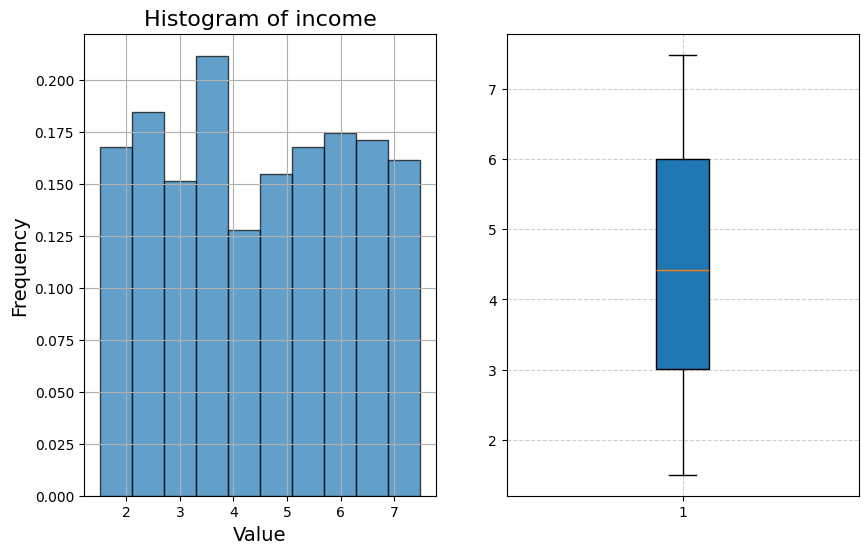

happiness


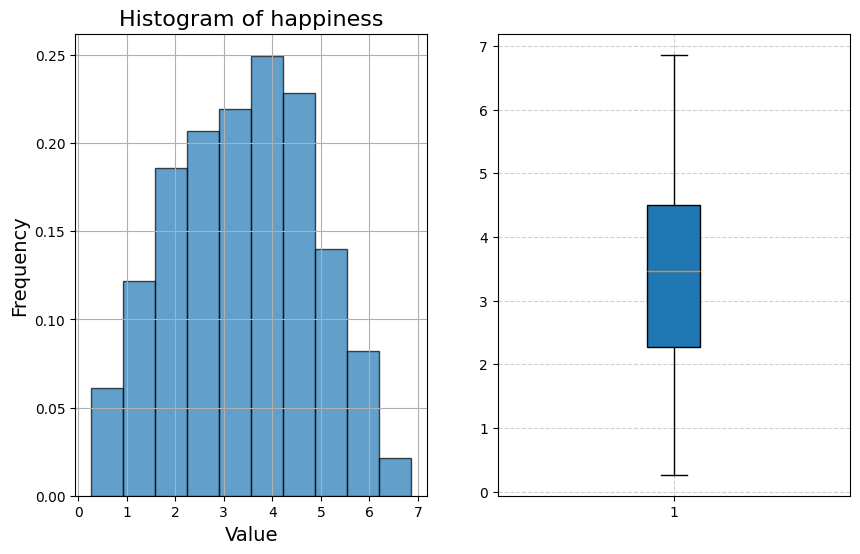

In [14]:
for i in data.columns:
    print(i)

    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    data[i].hist(edgecolor='black', alpha=0.7, orientation='vertical', density=True)
    plt.title(f'Histogram of {i}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.subplot(1, 2, 2)
    plt.boxplot(data[i], vert=True, patch_artist=True)  # vert=False for horizontal boxplot

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

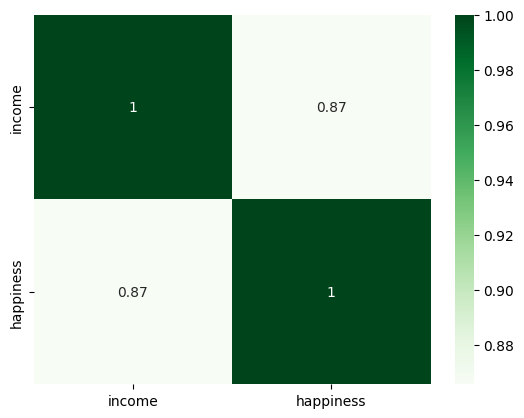

In [15]:
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap="Greens")
plt.show()

In [26]:
# Assuming you have a DataFrame named 'data' with columns 'income' and 'happiness'
X = data[['income']]
y = data['happiness']

In [27]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Fit the linear regression model
model = sm.OLS(y_train,X_train).fit()

In [29]:
# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              happiness   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.045e+04
Date:                Fri, 18 Jul 2025   Prob (F-statistic):                   2.91e-287
Time:                        15:05:09   Log-Likelihood:                         -425.90
No. Observations:                 398   AIC:                                      853.8
Df Residuals:                     397   BIC:                                      857.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
# Predicted values based on the model
y_pred = model.predict(X_test)
y_pred

487    3.192156
73     2.154743
231    3.176872
175    1.710851
237    1.662842
         ...   
247    4.486044
383    3.649061
19     1.500054
321    3.610722
331    4.701352
Length: 100, dtype: float64

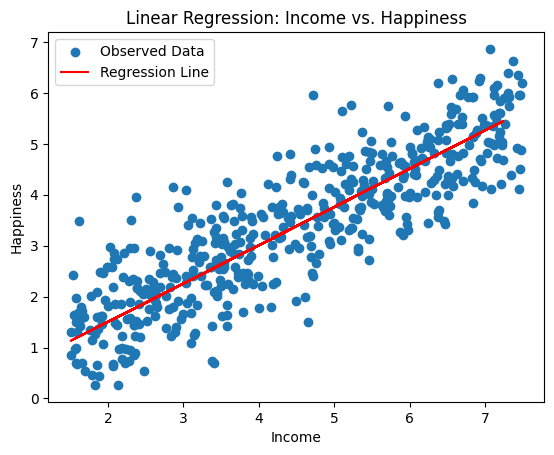

In [31]:
# Scatter plot of the data points
plt.scatter(data['income'], data['happiness'], label='Observed Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Linear Regression: Income vs. Happiness')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [32]:
income = float(input("Enter the income: "))
print(income)
new_data_point = [1,income]
pridicted_value = model.predict(new_data_point)
pridicted_value[0]

10.0


np.float64(0.7521799408350929)

Using Sklear Method

In [33]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.coef_

array([0.7247687])

In [36]:
model.intercept_

np.float64(0.14170387223712)

In [37]:
X_test['income']

487    4.243873
73     2.864664
231    4.223554
175    2.274523
237    2.210696
         ...   
247    5.964058
383    4.851314
19     1.994275
321    4.800344
331    6.250302
Name: income, Length: 100, dtype: float64

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([3.21752987, 2.21792257, 3.20280332, 1.79020704, 1.74394749,
       2.39018719, 4.44664262, 4.86010664, 1.89050708, 3.50456863,
       4.09833273, 2.4318678 , 2.85594355, 3.54519132, 2.78796716,
       1.80768864, 2.52124048, 5.16673969, 2.45094439, 3.996441  ,
       1.83486036, 2.72998006, 2.63135811, 1.23340488, 4.61112137,
       1.72884986, 2.46409207, 5.3782968 , 4.21884267, 4.12789401,
       1.34529138, 3.72063824, 2.83545189, 3.71043375, 4.0008309 ,
       4.01012804, 1.2713695 , 2.47646914, 1.31859325, 2.24910091,
       5.35598486, 4.42244764, 5.0893214 , 4.83614181, 2.94122983,
       2.15161714, 1.6263909 , 3.16872379, 2.67722482, 1.46401227,
       4.0291672 , 2.98869745, 5.14038236, 3.7164133 , 3.58847209,
       3.3425148 , 3.54804131, 3.94616611, 4.93059286, 3.81954393,
       4.89818897, 1.55970378, 5.09603988, 2.34495858, 2.2134292 ,
       5.38998089, 4.72238072, 3.7692388 , 2.40771063, 5.32646295,
       4.52828042, 3.42736682, 3.04261746, 3.07258943, 1.94085

In [39]:
# Evaluate the model
import numpy as np
mse = mean_squared_error(y_test, y_pred) # Cost function
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) # cost function

# Print the evaluation metrics
print("Evaluation Metrics:")

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 0.59
Mean Absolute Error (MAE): 0.6270
Root Mean Squared Error (RMSE): 0.7682
R-squared (R²): 0.6663


#### **MSE**
- MSE measures the average squared difference between the actual target values and the predicted values.
- Lower values indicate better performance, but MSE is sensitive to outliers because errors are squared.

#### **MAE**
- MAE measures the average of the absolute differences between the actual and predicted values.
- lower values indicate better model performance

#### **R-squared (R²)**

- R^2 = 1-SSR/SST
- R-squared measures how well the model's predictions fit the actual data. It indicates the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

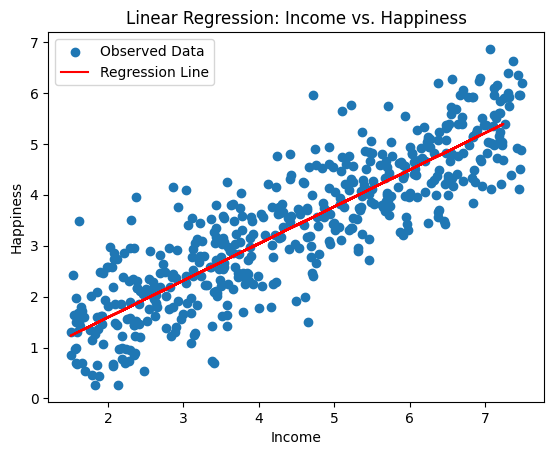

In [40]:
# Scatter plot of the data points
plt.scatter(data['income'], data['happiness'], label='Observed Data')

# Plot the regression line
plt.plot(X_test['income'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Linear Regression: Income vs. Happiness')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [42]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']